# Вариант №10

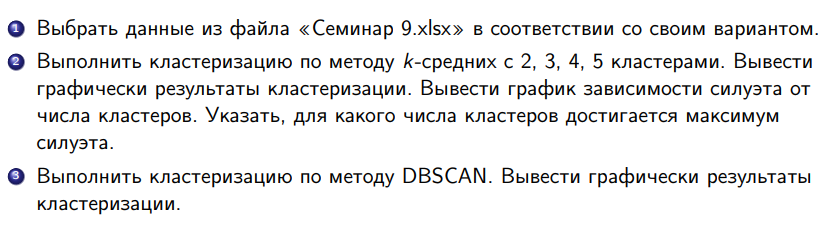

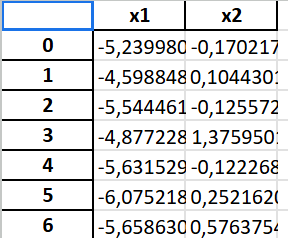

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import warnings

# Выбрать данные из файла «Семинар 9.xlsx» в соответствии со своим вариантом

In [13]:
warnings.filterwarnings("ignore", category=UserWarning)
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/Семинар 9.xlsx', sheet_name='10', names=['-', 'x1', 'x2']).drop('-', axis=1)
data

,x1,x2
0,-5.239981,-0.170217
1,-4.598848,0.104430
2,-5.544462,-0.125572
3,-4.877229,1.375950
4,-5.631529,-0.122269
...,...,...
395,4.027236,3.836573
396,2.835016,4.903530
397,2.423970,6.498164
398,2.816300,5.566248


# Выполнить кластеризацию по методу k-средних с 2, 3, 4, 5 кластерами. Вывести графически результаты кластеризации. Вывести график зависимости силуэта от числа кластеров. Указать, для какого числа кластеров достигается максимум силуэта

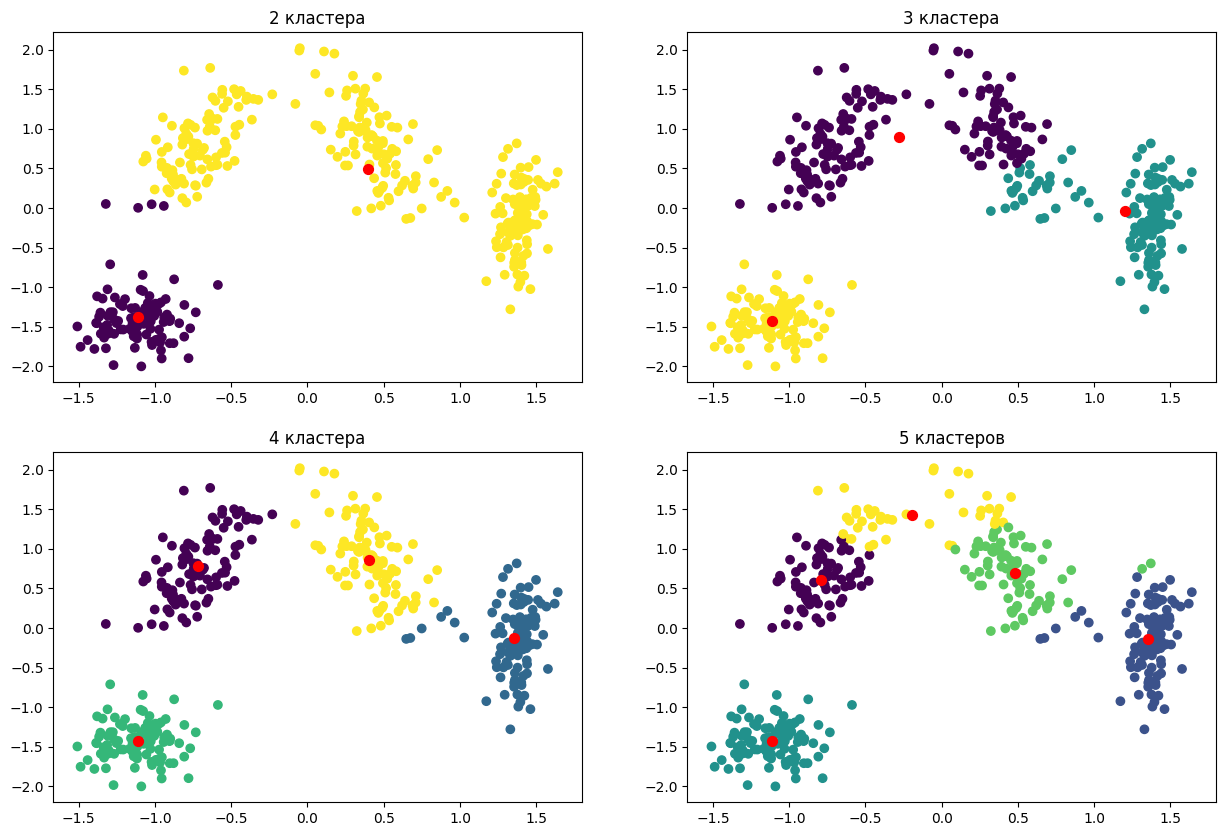

In [14]:
x1 = data['x1']
x2 = data['x2']
X = np.column_stack((x1, x2))
sc = StandardScaler().fit(X.astype('float64'))
Xsc = sc.transform(X.astype('float64'))

kmeans = [('2 кластера', KMeans(n_clusters=2, random_state= 0, n_init= 'auto').fit(Xsc)),
          ('3 кластера', KMeans(n_clusters=3, random_state= 0, n_init= 'auto').fit(Xsc)),
          ('4 кластера', KMeans(n_clusters=4, random_state= 0, n_init= 'auto').fit(Xsc)),
          ('5 кластеров', KMeans(n_clusters=5, random_state= 0, n_init= 'auto').fit(Xsc))]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
clasters_n = []
silhouette = []
for i, ax in enumerate(axs.flat):
  labels = kmeans[i][1].labels_
  centroids = kmeans[i][1].cluster_centers_
  ax.scatter(Xsc[:, 0], Xsc[:, 1], c=labels, cmap='viridis')
  ax.scatter(centroids[:, 0], centroids[:, 1], s=50, c='red')
  ax.set_title(kmeans[i][0])
  clasters_n.append(i+2)
  silhouette.append(silhouette_score(Xsc, labels))
plt.show()

Максимум силуэта достигается при числе кластеров равном 3


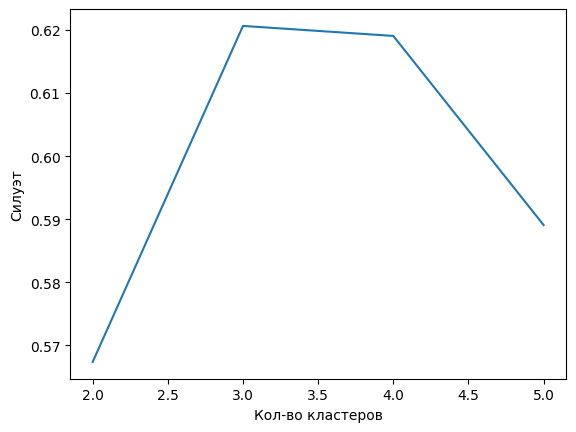

In [15]:
print('Максимум силуэта достигается при числе кластеров равном', clasters_n[silhouette.index(max(silhouette))])
plt.plot(clasters_n, silhouette)
plt.xlabel('Кол-во кластеров')
plt.ylabel('Силуэт')
plt.show()

# Выполнить кластеризацию по методу DBSCAN. Вывести графически результаты кластеризации.


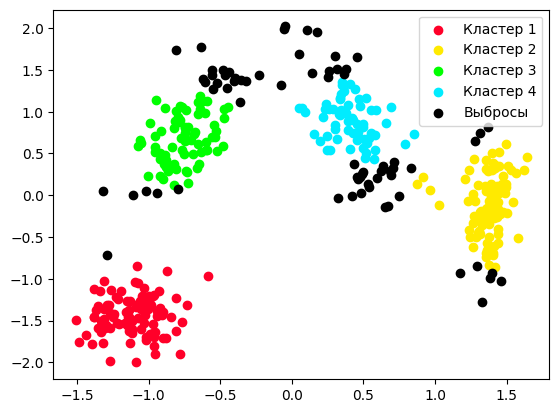

In [16]:
dbscan = DBSCAN(eps=0.4, min_samples=50)
labels = dbscan.fit_predict(Xsc)
unique_labels = set(labels)

colors = {}
for i, label in enumerate(unique_labels):
  if label != -1:
    colors[label] = plt.cm.gist_rainbow(i / len(unique_labels))
  else:
    colors[label] = 'black'

for label in unique_labels:
  if label == -1:
    plt.scatter(Xsc[labels == label][:, 0], Xsc[labels == label][:, 1], c='black', label='Выбросы')
  else:
    plt.scatter(Xsc[labels == label][:, 0], Xsc[labels == label][:, 1], c=colors[label], label=f'Кластер {label+1}')
plt.legend()
plt.show()